In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
# Leer los datos de sismos
# http://bdrsnc.sgc.gov.co/paginas1/catalogo/index.php
df = pd.read_csv('Sismicidad_LosSantos_2.csv', encoding='latin-1')
print(df.head())
dates = df.FECHA
values = df.MAGNITUD.values
print('Fechas: ', dates)
print('Magnitudes: ', values)
ts = pd.Series(values, index=dates)
print('TS: ', ts)

        FECHA  HORA_UTC  LATITUD (grados)  LONGITUD (grados)  \
0  2016-11-01  00:29:45             6.815            -73.142   
1  2016-11-01  00:29:45             6.816            -73.143   
2  2016-11-01  01:47:03             6.825            -73.064   
3  2016-11-01  02:17:12             6.832            -73.149   
4  2016-11-01  02:29:14             6.798            -73.160   

   PROFUNDIDAD (Km)  MAGNITUD DEPARTAMENTO   MUNICIPIO  FASES  RMS (Seg)  \
0             144.7       2.9    SANTANDER  LOS_SANTOS     25        0.6   
1             144.6       2.9    SANTANDER  LOS_SANTOS     25        0.6   
2             146.0       1.1    SANTANDER  LOS_SANTOS      4        0.6   
3             150.4       1.3    SANTANDER  LOS_SANTOS      4        0.4   
4             145.9       2.1    SANTANDER  LOS_SANTOS     15        0.3   

   GAP (grados)  ERROR LATITUD (Km)  ERROR LONGITUD (Km)  \
0            71                 3.4                  3.5   
1            71                 3.5   

In [9]:
# Dividir los datos en entrenamiento y prueba
train_data, test_data = train_test_split(ts, test_size=0.2, shuffle=False)

In [10]:
# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

In [11]:
#  Realizar el pronóstico
forecast = model_fit.forecast(steps=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [12]:
# Calcular el error absoluto medio (Mae)
mae = mean_absolute_error(test_data, forecast)
print('Error absoluto Medio (Mae):', mae)

Error absoluto Medio (Mae): 0.4123968728621876


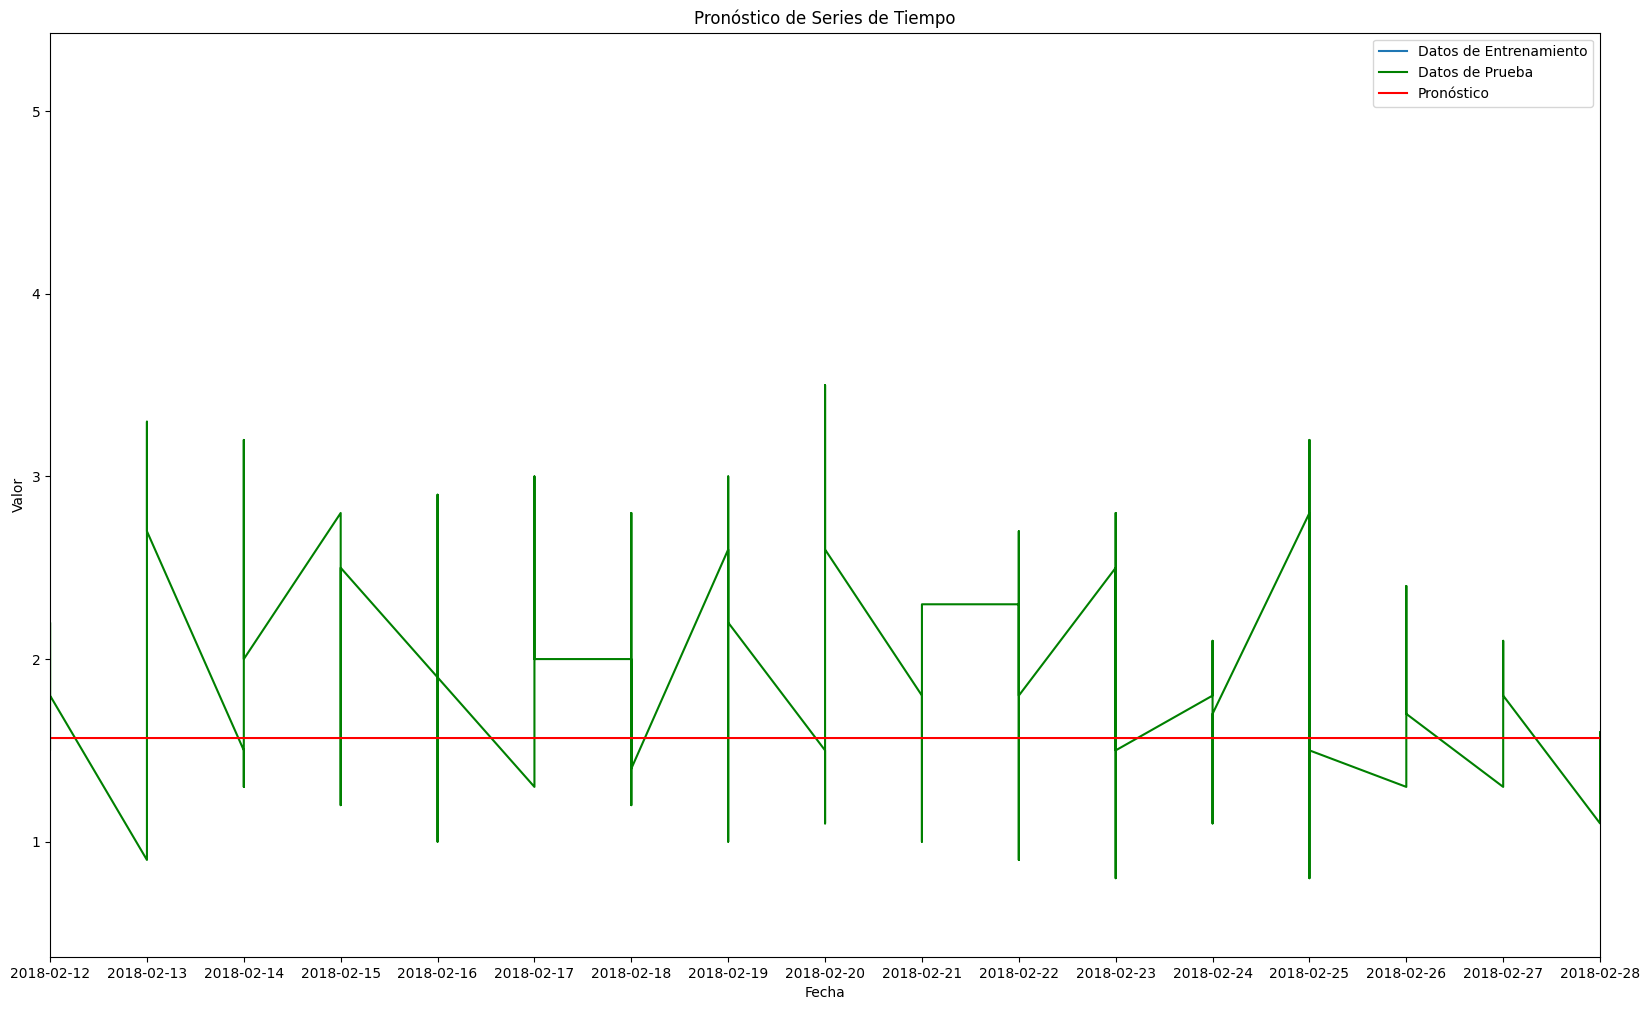

In [30]:
# Se visualizan los datos originales y el pronóstico
plt.figure(figsize=(20, 12))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba', color='green')
plt.plot(test_data.index, forecast, label='Pronóstico', color= 'red')
plt.legend()
plt.title('Pronóstico de Series de Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
# Zoom en un periodo específico
plt.xlim(['2018-02-12', '2018-02-28'])
plt.show()

Error residual:  FECHA
2017-10-29    0.602564
2017-10-29    1.332448
2017-10-29    0.642623
2017-10-29   -0.311870
2017-10-29   -0.474858
                ...   
2018-02-27    0.232365
2018-02-28   -0.467620
2018-02-28   -0.367626
2018-02-28   -0.167634
2018-02-28    0.032380
Length: 1491, dtype: float64


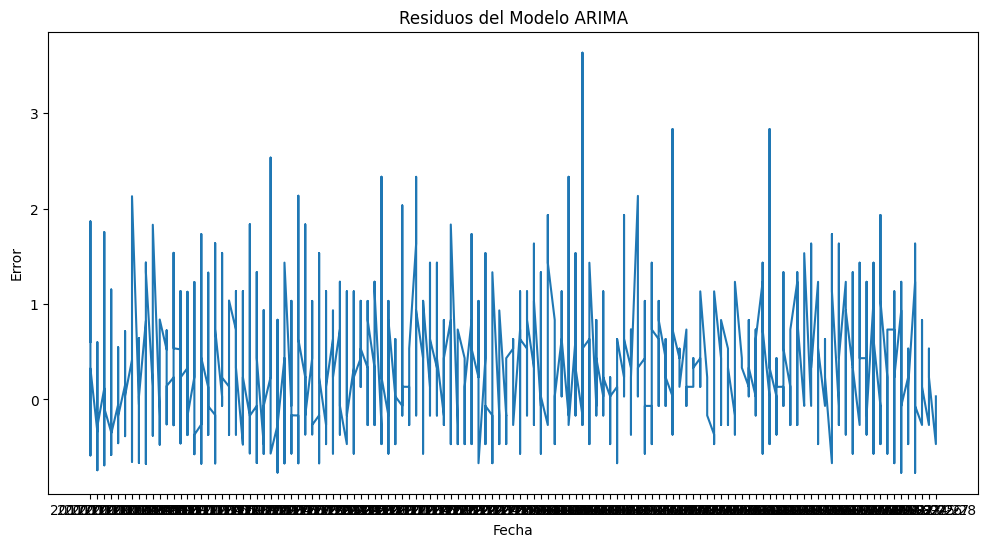

In [32]:
# Convert the index of 'forecast' to match the type of 'test_data'
forecast.index = test_data.index
print('Error residual: ',residuals)
# Now you should be able to calculate the residuals
residuals = test_data - forecast
# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.plot(residuals, scalex=True, scaley=True)
plt.title('Residuos del Modelo ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Error')
plt.show()